## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [31]:
wine = datasets.load_wine()
wine_d =wine.data
wine_fn = wine.feature_names
wine_t = wine.target
wine_fn

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [33]:
wine_d = pd.DataFrame(wine_d, columns=wine_fn)
wine_d = np.array(wine_d.loc[:, ['alcohol', 'ash', 'hue']])
X_train, X_test, y_train, y_test = train_test_split(wine_d, wine_t, test_size = 0.1, random_state=11)

In [34]:
X_train

array([[12.25 ,  2.12 ,  1.   ],
       [12.16 ,  2.31 ,  1.33 ],
       [13.39 ,  2.62 ,  0.92 ],
       [14.13 ,  2.74 ,  0.61 ],
       [13.82 ,  2.42 ,  1.01 ],
       [14.12 ,  2.32 ,  1.17 ],
       [13.71 ,  2.36 ,  1.11 ],
       [12.21 ,  1.75 ,  1.28 ],
       [14.22 ,  2.3  ,  0.94 ],
       [12.64 ,  2.02 ,  0.98 ],
       [11.41 ,  2.5  ,  1.1  ],
       [13.88 ,  2.59 ,  0.88 ],
       [12.52 ,  2.17 ,  0.9  ],
       [11.79 ,  2.78 ,  0.97 ],
       [12.53 ,  2.64 ,  0.82 ],
       [11.84 ,  2.23 ,  0.96 ],
       [13.08 ,  2.36 ,  0.57 ],
       [12.84 ,  2.61 ,  0.89 ],
       [13.86 ,  2.27 ,  1.01 ],
       [13.56 ,  2.46 ,  0.98 ],
       [13.78 ,  2.3  ,  0.7  ],
       [13.58 ,  2.69 ,  0.74 ],
       [11.03 ,  2.2  ,  1.71 ],
       [13.63 ,  2.7  ,  1.28 ],
       [13.73 ,  2.7  ,  1.19 ],
       [12.99 ,  2.6  ,  1.31 ],
       [11.45 ,  2.42 ,  0.8  ],
       [14.38 ,  2.28 ,  1.04 ],
       [11.82 ,  1.88 ,  0.94 ],
       [13.16 ,  2.67 ,  1.03 ],
       [14

In [35]:
lg_reg = linear_model.LogisticRegression()
lg_reg.fit(X_train, y_train)

C:\Users\SamuelWork\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SamuelWork\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_pred = lg_reg.predict(X_test)

In [37]:
acc = accuracy_score(y_test, y_pred)
print(f'accuracy: {acc}')

accuracy: 0.6666666666666666


In [38]:
boston = datasets.load_boston()
boston_d = boston.data[:, 0]
boston_fn = boston.feature_names[0]
boston_t = boston.target

In [47]:
X_train, X_test, y_train, y_test = train_test_split(boston_d, boston_t, test_size=0.2, random_state=3)

In [50]:
X_train = np.reshape(X_train, (-1, 1))
X_test =  np.reshape(X_test, (-1, 1))
ln = linear_model.LinearRegression()
ln.fit(X_train, y_train)
y_pred = ln.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'mse: {mse}')

mse: 69.4298610659868


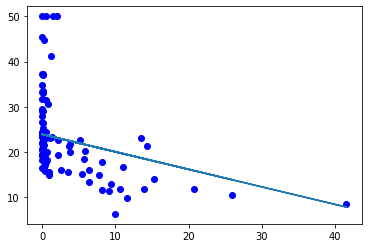

In [51]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred)
plt.show()